In [1]:
import numpy as np
import random
import time
import matplotlib.pyplot as plt
from math import e

Tworzymy funkcję, która będzie generować losowe macierze kwadratowe n x n wypełnione losowymi liczbami z przedziału (-x,x) oraz wektor B w przedziale (-y,y)

In [2]:
def generate_matrices(n,x,y):
    A = [[random.randrange(-x , x) for i in range(n)] for i in range(n)]
    B = [random.randrange(-y , y) for i in range(n)]
    return A,B

Tworzymy funkcję, która wykonuje algorytm Crouta (znajduje dolną i górną macierz tak, aby L*U = A)

In [3]:
def crout(A):
    n = len(A)
    L = [[0] * n for i in range(n)]
    U = [[0] * n for i in range(n)] #inicjalizujemy macierze L i U wypełnione zerami o rządanym wymiarze
    for j in range(n):
        U[j][j] = 1             # wrzucamy jedynki na diagonalę macierzy U
        for i in range(j, n):  # zaczynajać od [j,j], szukamy j-tej kolumny w macierzy L
            alpha = float(A[i][j]) #alpha to odpowiadająca wartość w macierzy A
            for k in range(j):
                alpha -= L[i][k]*U[k][j] #od której później odejmujemy wartości, otrzymując wyraz L
            L[i][j] = alpha
        for i in range(j+1, n):# zaczynając od [j,j+1], szukamy j-tego wiersza w macierzy U
            tempU = float(A[j][i])
            for k in range(j):
                tempU -= L[j][k]*U[k][i] #tempU służy nam jak wcześniej alpha
            if int(L[j][j]) == 0: #zamiast dzielenia przez zero przyjmujemy dzielenie przez 10^{-40}
                L[j][j] = e-40
            U[j][i] = tempU/L[j][j]
    return(L,U)

Tworzymy funkcję, która liczy wektory x i y, które spełniają:
L * x = B
U * y = x

In [4]:
def calculate(A,B):
    L,U = crout(A)
    x = np.linalg.solve(L,B)
    y = np.linalg.solve(U,x)
    return y

Tworzymy funkcję, która łączy wszystkie poprzednie funkcje i wypisuje odpowiednie wartości:
Druga funkcja służy tylko do tego, aby przy badaniu złożoności obliczeniowej nie wyświetlać wartości.

In [5]:
def LUD_AS(n,x,y):
    A,B = generate_matrices(n,x,y)
    print("Macierz A z układu równań: \n",A)
    print("Wektor B stworzony z wyników układu równań: \n",B)
    print("Wykonujemy algorytm Crouta i otrzymujemy macierz dolną L i górną U:")
    L,U = crout(A)
    print(L,U)
    rozw = calculate(A,B)
    print("Dostajemy wektor rozwiązań:")
    print(rozw)
def LUD_ASmuted(n,x,y):
        A,B = generate_matrices(n,x,y)
        L,U = crout(A)
        rozw = calculate(A,B)
        return(rozw)

In [20]:
x = LUD_AS(2,20,100)

Macierz A z układu równań: 
 [[17, -7], [1, -2]]
Wektor B stworzony z wyników układu równań: 
 [-70, 4]
Wykonujemy algorytm Crouta i otrzymujemy macierz dolną L i górną U:
[[17.0, 0], [1.0, -1.5882352941176472]] [[1, -0.4117647058823529], [0, 1]]
Dostajemy wektor rozwiązań:
[-6.22222222 -5.11111111]


Badamy złożoność obliczeniową:

Text(0,0.5,'czas w sekundach')

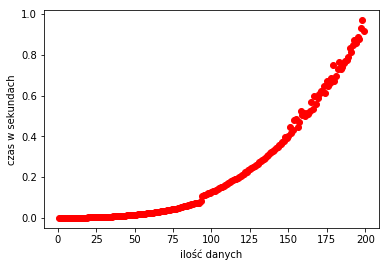

In [19]:
n=1
pomiary_czasu= []
liczby=[]
while n < 200:
    start = time.time()
    LUD_ASmuted(n,20,20)
    czas = start- time.time()
    pomiary_czasu.append(-czas)
    liczby.append(n)
    n+=1
plt.plot(liczby, pomiary_czasu, 'ro')
plt.xlabel("ilość danych")
plt.ylabel("czas w sekundach")